<a href="https://colab.research.google.com/github/visith1577/Machine-learning-first-projects/blob/main/Boston_housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)

In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
train_dataset = data.sample(frac=0.7, random_state=0)
test_dataset = data.drop(train_dataset.index)

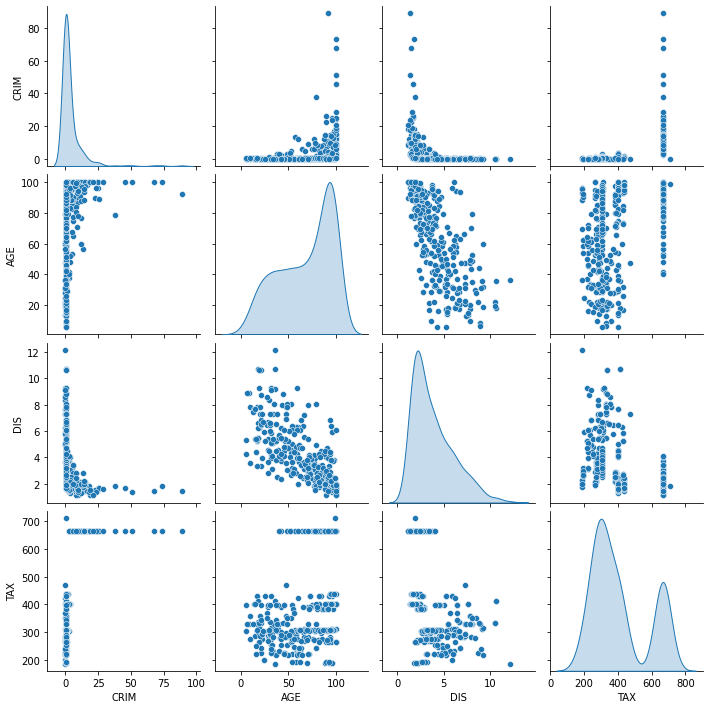

In [7]:
sns.pairplot(train_dataset[["CRIM","AGE","DIS","TAX"]], diag_kind="kde")

In [8]:
data['MEDV'] = pd.Series(data=boston.target, index=data.index) 
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
(train_features, train_labels) , (test_features, test_labels) = tf.keras.datasets.boston_housing.load_data()

In [10]:
train_features.shape

(404, 13)

In [11]:
test_features.shape

(102, 13)

In [12]:
train_labels.shape

(404,)

In [13]:
train_mean = np.mean(train_features, axis = 0 )
train_std = np.std(train_features, axis=0)
train_features = (train_features - train_mean)/train_std

In [14]:
tf.keras.backend.clear_session()

inputs = tf.keras.Input(shape=([len(train_features[0])]))
x = tf.keras.layers.Dense(512, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              loss='mse',
              metrics=['mse', 'mae'])

In [16]:
history = model.fit(train_features, train_labels, epochs=1000, validation_split=0.1)

Epoch 1/1000
12/12 [==============================] - 1s 40ms/step - loss: 570.5406 - mse: 570.5406 - mae: 21.9781 - val_loss: 490.6044 - val_mse: 490.6044 - val_mae: 21.1509
Epoch 2/1000
12/12 [==============================] - 0s 6ms/step - loss: 592.8427 - mse: 592.8427 - mae: 22.3649 - val_loss: 473.9295 - val_mse: 473.9295 - val_mae: 20.7381
Epoch 3/1000
12/12 [==============================] - 0s 5ms/step - loss: 551.5901 - mse: 551.5901 - mae: 21.5349 - val_loss: 457.2665 - val_mse: 457.2665 - val_mae: 20.3164
Epoch 4/1000
12/12 [==============================] - 0s 6ms/step - loss: 490.5051 - mse: 490.5051 - mae: 20.3789 - val_loss: 439.7509 - val_mse: 439.7509 - val_mae: 19.8656
Epoch 5/1000
12/12 [==============================] - 0s 6ms/step - loss: 495.4368 - mse: 495.4368 - mae: 20.3734 - val_loss: 420.6888 - val_mse: 420.6888 - val_mae: 19.3708
Epoch 6/1000
12/12 [==============================] - 0s 6ms/step - loss: 488.0449 - mse: 488.0449 - mae: 20.0306 - val_loss: 400

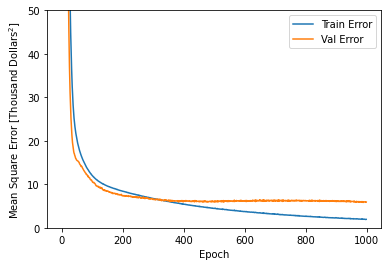

In [17]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.legend()
    plt.ylim([0,50])

plot_history()

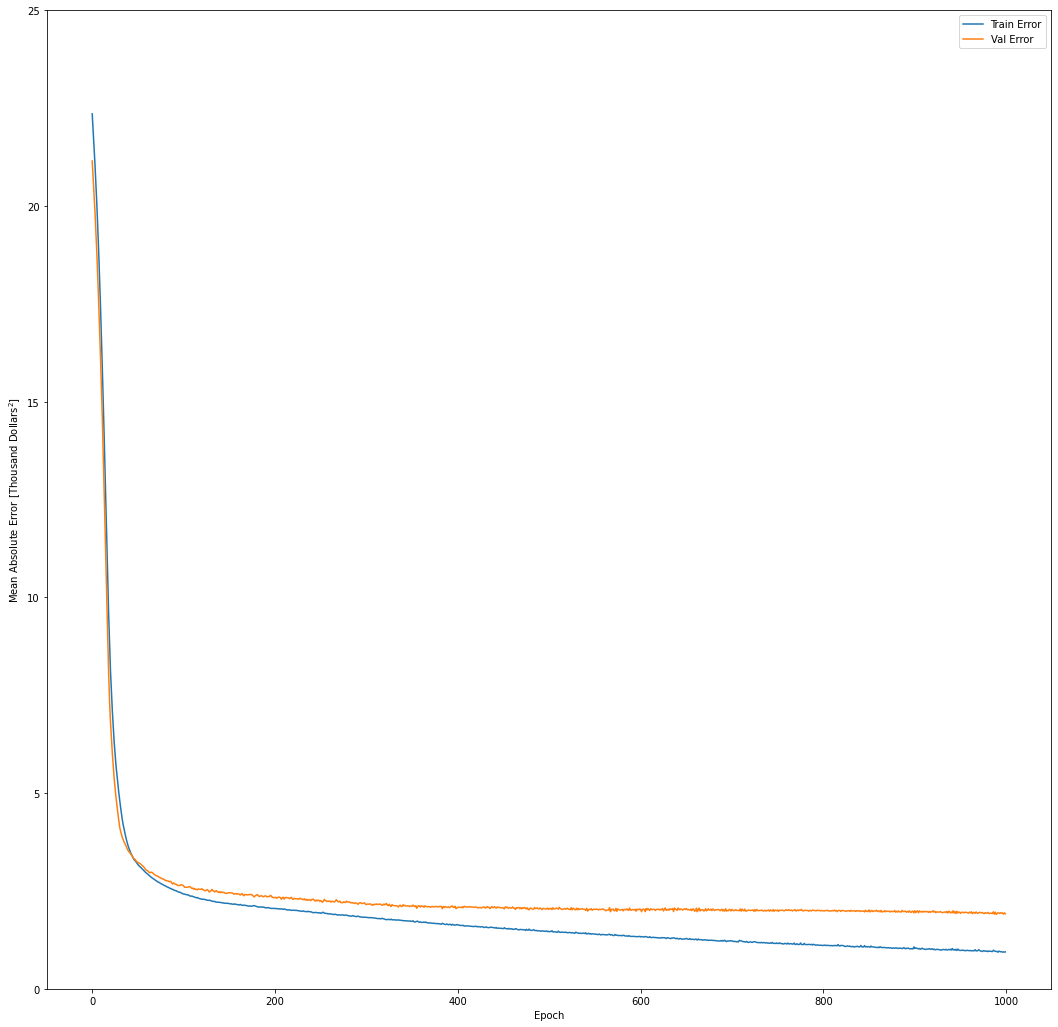

In [20]:

def plot_history():
    plt.figure(figsize=(18, 18))
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error [Thousand Dollars$^2$]')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
    plt.legend()
    plt.ylim([0,25])

plot_history()    

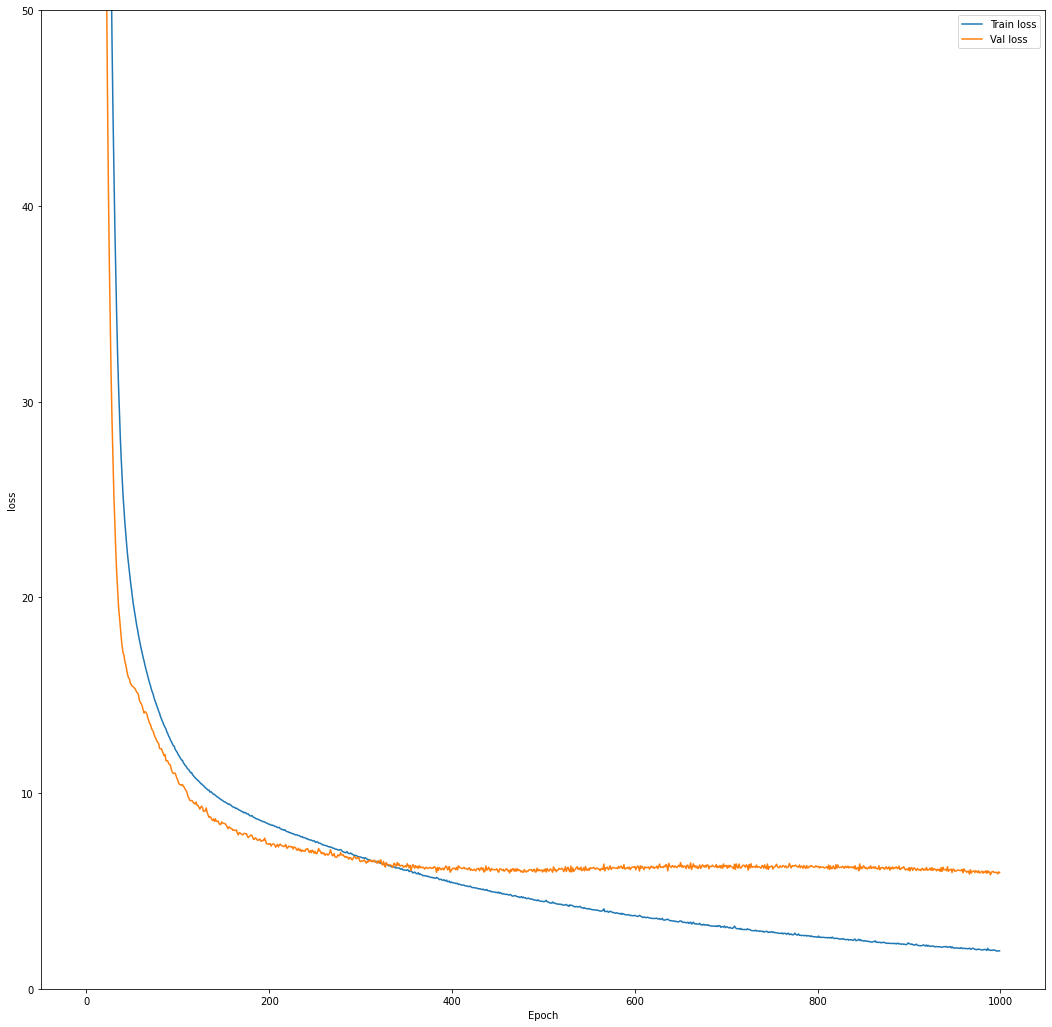

In [22]:
def plot_history():
    plt.figure(figsize=(18, 18))
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='Train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label = 'Val loss')
    plt.legend()
    plt.ylim([0,50])

plot_history()    

In [23]:
test_features_norm = (test_features - train_mean) / train_std
mse, _, _ = model.evaluate(test_features_norm, test_labels)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

4/4 [==============================] - 0s 3ms/step - loss: 13.7242 - mse: 13.7242 - mae: 2.3917
Root Mean Square Error on test set: 3.705
